In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

Using TensorFlow backend.


In [2]:
# Read dataset and view the first 5 rows
# Dataset from kaggle.com; usability 4.7 
# https://www.kaggle.com/einsteindata4u/covid19

data = "dataset.xlsx"
data_df = pd.read_excel(data)
data_df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Assess the number of values in each columns (number of results for which we have each test)
data_df.count()

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Hematocrit                                                603
Hemoglobin                                                603
Platelets                                                 602
Mean platelet volume                                      599
Red blood Cells                                           602
Lymphocytes                                               602
Mean corpuscular hemoglobin concentration (MCHC)          602
Leukocytes                                                602
Basophils                                                 602
Mean corpuscular hemoglobin (MCH)                         602
Eosinoph

In [4]:
# There are 111 columns. Lots of cleaning to be done.
# There are some columns that are empty so we remove those columns
data_df1 = data_df.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
data_df1.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 106 columns remaining. 
# For this project, we are not interested in the results of tests for other diseases/viruses.
# These were likely just tests to rule out other possible diagnoses.
columns1 = ['Influenza B, rapid test','Influenza A, rapid test','Respiratory Syncytial Virus','Influenza A','Influenza B','Parainfluenza 1','CoronavirusNL63','Rhinovirus/Enterovirus','Coronavirus HKU1','Parainfluenza 3','Chlamydophila pneumoniae','Adenovirus', 'Parainfluenza 4','Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Bordetella pertussis', 'Metapneumovirus','Parainfluenza 2']
data_df2 = data_df1.drop(columns1, axis=1)
data_df2.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 87 columns still remain
# Reassess the remaining columns 
data_df2.count()

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Hematocrit                                                603
Hemoglobin                                                603
Platelets                                                 602
Mean platelet volume                                      599
Red blood Cells                                           602
Lymphocytes                                               602
Mean corpuscular hemoglobin concentration (MCHC)          602
Leukocytes                                                602
Basophils                                                 602
Mean corpuscular hemoglobin (MCH)                         602
Eosinoph

In [7]:
# We will keep the columns with the largest number of results.
# Not only will this give us a richer dataset, it will reflect tests that are more commonly/frequently done.
# Removing patient ID because it is irrelevant to this project.
data_df3 = data_df2[['SARS-Cov-2 exam result','Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)','Patient addmited to intensive care unit (1=yes, 0=no)','Proteina C reativa mg/dL','Neutrophils','Mean platelet volume ','Hematocrit','Hemoglobin','Platelets','Red blood Cells','Lymphocytes','Mean corpuscular hemoglobin concentration (MCHC)','Leukocytes','Basophils','Mean corpuscular hemoglobin (MCH)','Eosinophils','Mean corpuscular volume (MCV)','Monocytes','Red blood cell distribution width (RDW)']]
data_df3.head()

,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Proteina C reativa mg/dL,Neutrophils,Mean platelet volume,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
0,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,0,0,0,-0.147895,-0.619086,0.010677,0.236515,-0.02234,-0.517413,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Rename columns 
data_df4 = data_df3.rename(columns={'SARS-Cov-2 exam result':'COVID19', 
                                    'Patient addmited to regular ward (1=yes, 0=no)':'RegularWard',
                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)':'SIU',
                                    'Patient addmited to intensive care unit (1=yes, 0=no)':'ICU',
                                    'Proteina C reativa mg/dL':'CRP',
                                    'Mean platelet volume ':'MPV',
                                    'Red blood Cells':'RBCs',
                                    'Mean corpuscular hemoglobin concentration (MCHC)':'MCHC',
                                    'Leukocytes':'WBCs',
                                    'Mean corpuscular hemoglobin (MCH)':'MCH',
                                    'Mean corpuscular volume (MCV)':'MCV',
                                    'Red blood cell distribution width (RDW)':'RDW'
                                   })
data_df4.head()

,COVID19,RegularWard,SIU,ICU,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW
0,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,0,0,0,-0.147895,-0.619086,0.010677,0.236515,-0.02234,-0.517413,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
2,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Count the number of NaNs in each row. 
# There are 4 columns that we know are complete for each row (COVID19, RegularWard, SIU, ICU).
# Any row with 16 NaNs will not have ANY data for the 16 tests/variables we're interested in.
data_df4.shape[1] - data_df4.count(axis=1)

0       16
1        0
2       16
3       16
4       16
5       16
6       16
7       16
8        0
9       16
10      16
11      16
12      16
13      16
14      16
15       1
16      16
17      16
18       0
19      16
20      16
21      16
22       1
23      16
24      16
25      16
26      16
27      16
28       0
29       0
        ..
5614     0
5615     0
5616    16
5617    16
5618     0
5619    16
5620    16
5621    16
5622    16
5623    16
5624    16
5625    16
5626    16
5627    16
5628    16
5629    16
5630    16
5631    16
5632    16
5633    16
5634    16
5635    16
5636    16
5637    16
5638    16
5639    16
5640    16
5641    16
5642    16
5643     0
Length: 5644, dtype: int64

In [10]:
# Reassess the number of values in each column 
data_df4.count()

COVID19        5644
RegularWard    5644
SIU            5644
ICU            5644
CRP             506
Neutrophils     513
MPV             599
Hematocrit      603
Hemoglobin      603
Platelets       602
RBCs            602
Lymphocytes     602
MCHC            602
WBCs            602
Basophils       602
MCH             602
Eosinophils     602
MCV             602
Monocytes       601
RDW             602
dtype: int64

In [11]:
## Based on literature, common laboratory findings include normal/low white cell counts with elevated C-reactive protein (CRP)
# Indian J Pediatr. 2020 Apr;87(4):281-286. doi: 10.1007/s12098-020-03263-6. Epub 2020 Mar 13.
## 80% of patients had decreased lymphocyte count
# American Journal of Roentgenology: 1-8. 10.2214/AJR.20.22975

# Out of the 16 tests, Hematocrit and Hemoglobin were done most frequently (606)
# The 15 tests (this is excluding CRP) are part of a common panel, CBC.
# But based on the literature and professional knowledge, CRP may be more significantly implicated
# We will remove all rows that have the CRP column as NaN

data_df5 = data_df4[data_df4['CRP'].notna()]
data_df5.count()

COVID19        506
RegularWard    506
SIU            506
ICU            506
CRP            506
Neutrophils    422
MPV            500
Hematocrit     502
Hemoglobin     502
Platelets      502
RBCs           502
Lymphocytes    502
MCHC           502
WBCs           502
Basophils      502
MCH            502
Eosinophils    502
MCV            502
Monocytes      501
RDW            502
dtype: int64

In [12]:
# Determine the proportion of positive COVID19 cases to ensure our sample from the larger dataset is somewhat representative
# data_df5 has 70 positive COVID19 cases out of 506 (13.8%)
# data_df4 has 558 positive COVID19 cases out of 5644 (9.9%)

positive_df5 = data_df5.loc[data_df5.COVID19 == 'positive', 'COVID19'].count()
positive_df4 = data_df4.loc[data_df4.COVID19 == 'positive', 'COVID19'].count()

print("Proportion of Positives from Sample Data: ", ((positive_df5/506)*100))
print("Proportion of Positives from Larger Dataset: ", ((positive_df4/5644)*100))

Proportion of Positives from Sample Data:  13.83399209486166
Proportion of Positives from Larger Dataset:  9.886605244507441


In [13]:
# Assess number of admitted patients
regular_ward = data_df5.loc[data_df5.RegularWard == 1, 'RegularWard'].count()
SIU = data_df5.loc[data_df5.SIU == 1, 'SIU'].count()
ICU = data_df5.loc[data_df5.ICU == 1, 'ICU'].count()

print("Regular Ward:", regular_ward)
print("Semi-intensive Unit:", SIU)
print("Intensive-care Unit:", ICU)

total_admissions = regular_ward + SIU + ICU

print("Total Admissions:", total_admissions)

Regular Ward: 54
Semi-intensive Unit: 39
Intensive-care Unit: 28
Total Admissions: 121


In [14]:
# For our assessment of severity, we will create a new column called "Admission"
# First, we will recode SIU and ICU 
# 1 = Regular Ward
# 2 = Semi-Intensive Unit 
# 3 = Intensive Care Unit
data_df5.loc[data_df5.SIU == 1, 'SIU'] = 2
data_df5.loc[data_df5.ICU == 1, 'ICU'] = 3

# Also change values in COVID19 column to 0 for negative and 1 for positive
data_df5.loc[data_df5.COVID19 == 'positive', 'COVID19'] = 1
data_df5.loc[data_df5.COVID19 == 'negative', 'COVID19'] = 0

data_df5.tail(10)

C:\Users\mkarr\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,COVID19,RegularWard,SIU,ICU,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW
5564,1,1,0,0,0.239572,0.667504,0.010677,1.152058,0.604220,-0.529975,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,-0.456253,0.126132,0.488863,-0.890442
5566,1,1,0,0,0.227650,0.913350,-0.438097,1.106281,1.042812,-0.253615,0.930631,-0.483364,0.044991,0.155841,-0.529226,0.073631,-0.793368,0.046015,-0.640455,0.171035
5581,0,0,2,0,0.648897,0.356101,-0.325903,-2.212562,-2.027332,0.826701,-2.031269,-0.312784,0.244149,0.609436,0.387152,0.230447,0.344395,0.106103,-0.167718,-0.448160
5583,0,0,0,0,-0.463830,-2.626823,-0.101517,-1.731902,-1.588740,-0.856582,-1.555249,3.218241,0.144572,-1.928470,1.608988,0.073631,0.344395,-0.034103,-1.585931,-0.359703
5585,1,0,0,0,-0.302882,-1.094387,1.132609,1.197836,1.356092,-1.911774,0.384090,0.966573,0.841616,-0.834833,-0.529226,1.589509,-0.582671,1.307876,1.197969,-0.094334
5602,0,0,0,0,3.627427,1.118221,0.908221,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
5614,0,0,0,0,5.733660,1.134611,-0.774677,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
5615,0,0,0,0,0.561468,-0.061837,-0.213711,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812
5618,0,0,0,0,0.609157,1.552548,-0.550290,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160
5643,1,0,0,0,-0.503570,0.380685,-0.325903,0.694287,0.541564,-0.906829,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,-0.835508,0.025985,0.567652,-0.182790


In [15]:
# Ensure all columns are int or float
data_df5.astype({'COVID19':'int32'}).dtypes

COVID19          int32
RegularWard      int64
SIU              int64
ICU              int64
CRP            float64
Neutrophils    float64
MPV            float64
Hematocrit     float64
Hemoglobin     float64
Platelets      float64
RBCs           float64
Lymphocytes    float64
MCHC           float64
WBCs           float64
Basophils      float64
MCH            float64
Eosinophils    float64
MCV            float64
Monocytes      float64
RDW            float64
dtype: object

In [16]:
# Create new column "AdmissionType" 
# 0 = No Admission 
# 1 = Regular 
# 2 = SIU
# 3 = ICU 
data_df5['AdmissionType'] = data_df5[['RegularWard', 'SIU', 'ICU']].max(axis=1)
data_df5.drop(['RegularWard', 'SIU', 'ICU'], axis = 1, inplace = True)
data_df5.head()

C:\Users\mkarr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mkarr\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,COVID19,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW,AdmissionType
1,0,-0.147895,-0.619086,0.010677,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
8,0,-0.286986,-0.127395,-1.672222,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,2
18,0,-0.487674,0.265957,-0.550290,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
28,0,-0.434025,0.651115,0.796029,1.014726,0.854844,-0.178244,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.544077,0.217977,0.767079,0.068652,0.171035,0
29,0,-0.529401,0.347905,-0.550290,0.740064,0.854844,0.361914,0.436981,-0.227493,0.642463,0.105751,-0.529226,0.596348,-0.371974,0.386517,0.121178,-0.713529,0


In [17]:
# Simple imputation: Replace NaNs in each column with means
columns = ['Neutrophils', 'MPV', 'Hematocrit', 'Hemoglobin', 'Platelets','RBCs','Lymphocytes','MCHC', 'WBCs', 'Basophils','MCH','Eosinophils', 'MCV', 'Monocytes', 'RDW']
data_df5[columns] = data_df5[columns].fillna(data_df5[columns].mean())
data_df5.tail(10)

C:\Users\mkarr\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,COVID19,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW,AdmissionType
5564,1,0.239572,0.667504,0.010677,1.152058,0.604220,-0.529975,0.930631,-0.679533,-1.647838,-0.662300,0.081693,-0.658171,-0.456253,0.126132,0.488863,-0.890442,1
5566,1,0.227650,0.913350,-0.438097,1.106281,1.042812,-0.253615,0.930631,-0.483364,0.044991,0.155841,-0.529226,0.073631,-0.793368,0.046015,-0.640455,0.171035,1
5581,0,0.648897,0.356101,-0.325903,-2.212562,-2.027332,0.826701,-2.031269,-0.312784,0.244149,0.609436,0.387152,0.230447,0.344395,0.106103,-0.167718,-0.448160,2
5583,0,-0.463830,-2.626823,-0.101517,-1.731902,-1.588740,-0.856582,-1.555249,3.218241,0.144572,-1.928470,1.608988,0.073631,0.344395,-0.034103,-1.585931,-0.359703,0
5585,1,-0.302882,-1.094387,1.132609,1.197836,1.356092,-1.911774,0.384090,0.966573,0.841616,-0.834833,-0.529226,1.589509,-0.582671,1.307876,1.197969,-0.094334,0
5602,0,3.627427,1.118221,0.908221,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
5614,0,5.733660,1.134611,-0.774677,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0
5615,0,0.561468,-0.061837,-0.213711,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0
5618,0,0.609157,1.552548,-0.550290,-3.242548,-2.779203,-1.773594,-3.318285,-1.830953,1.538664,-1.733675,-1.140144,2.059952,-0.582671,1.408024,1.381812,-0.448160,0
5643,1,-0.503570,0.380685,-0.325903,0.694287,0.541564,-0.906829,0.578024,-0.295726,-0.353319,-1.288428,-1.140144,-0.135455,-0.835508,0.025985,0.567652,-0.182790,0


In [18]:
# data_final is our final dataset: 506 rows, 18 columns
data_final = data_df5
data_final.head()

,COVID19,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW,AdmissionType
1,0,-0.147895,-0.619086,0.010677,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
8,0,-0.286986,-0.127395,-1.672222,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,2
18,0,-0.487674,0.265957,-0.550290,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
28,0,-0.434025,0.651115,0.796029,1.014726,0.854844,-0.178244,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.544077,0.217977,0.767079,0.068652,0.171035,0
29,0,-0.529401,0.347905,-0.550290,0.740064,0.854844,0.361914,0.436981,-0.227493,0.642463,0.105751,-0.529226,0.596348,-0.371974,0.386517,0.121178,-0.713529,0


In [19]:
# Reassess the number of COVID19+ and the number of COVID19- cases
data_final['COVID19'].value_counts()

0    436
1     70
Name: COVID19, dtype: int64

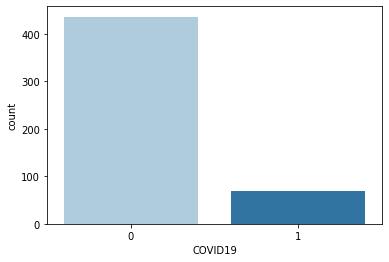

<Figure size 432x288 with 0 Axes>

In [20]:
# Visualize the number of cases 
sns.countplot(x='COVID19', data=data_final, palette='Paired')
plt.show()
plt.savefig('pos_and_neg_cases')

In [21]:
# Groupby COVID19 to see if there is a difference between each of the 16 tests for those that are positive/negative for COVID.
data_final.groupby('COVID19').mean()

,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW,AdmissionType
COVID19,,,,,,,,,,,,,,,,,
0,-0.028838,0.053922,-0.074804,-0.036466,-0.039671,0.114116,-0.046046,-0.031070,-0.019271,0.155527,-0.022921,0.009506,0.070182,0.023627,-0.090602,0.03058,0.348624
1,0.179621,-0.078458,0.221939,0.283931,0.296728,-0.778439,0.374242,-0.031688,0.115468,-0.714671,-0.238779,-0.141149,-0.504047,-0.217168,0.405778,-0.08393,0.914286


In [22]:
# Groupby AdmissionType to see if there is a difference between each of the 16 tests for the different admission types
data_final.groupby('AdmissionType').mean()

,COVID19,CRP,Neutrophils,MPV,Hematocrit,Hemoglobin,Platelets,RBCs,Lymphocytes,MCHC,WBCs,Basophils,MCH,Eosinophils,MCV,Monocytes,RDW
AdmissionType,,,,,,,,,,,,,,,,,
0,0.077922,-0.229992,-0.045565,0.002929,0.172905,0.170412,0.016850,0.126719,0.083608,0.035325,-0.050245,0.004478,0.057085,0.081032,0.048390,0.004133,-0.118528
1,0.444444,0.384330,0.307119,-0.067842,-0.215318,-0.236454,-0.533593,-0.096207,-0.291300,-0.119972,-0.296949,0.090516,-0.199948,-0.221671,-0.161247,0.069406,0.305740
2,0.205128,0.834046,0.247378,-0.147545,-0.721284,-0.701917,0.014370,-0.557552,-0.381891,-0.097992,0.471581,-0.482232,-0.191747,-0.341721,-0.173283,-0.098356,0.354753
3,0.285714,1.259477,0.333150,-0.313883,-0.815542,-0.785400,0.608215,-0.561653,-0.618915,-0.129270,1.241826,-0.518316,-0.337074,-0.377994,-0.288050,-0.450047,0.812345


In [23]:
# Since the number of Negatives cases is underrepresented, using SMOTE we will up-sample these. 
# Oversampling only in the training data, so that none of the information in the test data is being used to create synthetic data

# Make sure that we don't include AdmissionType in this
X = data_final.loc[:, 'CRP':'RDW']
y = data_final.loc[:, data_final.columns == 'COVID19']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Named columns2 because we have columns in previous code
columns2 = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns2 )
os_data_y= pd.DataFrame(data=os_data_y,columns=['COVID19'])

print("Length of Oversampled Data: ", len(os_data_X))
print("Number of Negatives in OS data: ", len(os_data_y[os_data_y['COVID19']==0]))
print("Number of Positives in OS data: ", len(os_data_y[os_data_y['COVID19']==1]))
print("Proportion of Negatives in OS data: ", len(os_data_y[os_data_y['COVID19']==0])/len(os_data_X))
print("Proportion of Positives in OS data: ", len(os_data_y[os_data_y['COVID19']==1])/len(os_data_X))

Length of Oversampled Data:  614
Number of Negatives in OS data:  307
Number of Positives in OS data:  307
Proportion of Negatives in OS data:  0.5
Proportion of Positives in OS data:  0.5


In [24]:
# Using Recursive Feature Elimination (repeatedly construct model and choose the best/worst features, setting aside that feature and repeating process)
data_final_vars=data_final.columns.values.tolist()
y=['COVID19']
X=['CRP','Neutrophils', 'MPV', 'Hematocrit', 'Hemoglobin', 'Platelets','RBCs','Lymphocytes','MCHC', 'WBCs', 'Basophils','MCH','Eosinophils', 'MCV', 'Monocytes', 'RDW']

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [25]:
# Results show that all variables were selected and that all rank highly, equally 
# We will use all of these variables in our model 
columns3 = ['CRP','Neutrophils', 'MPV', 'Hematocrit', 'Hemoglobin', 'Platelets','RBCs','Lymphocytes','MCHC', 'WBCs', 'Basophils','MCH','Eosinophils', 'MCV', 'Monocytes', 'RDW']
X = os_data_X[columns3]
y = os_data_y['COVID19']

log_model=sm.Logit(y,X)
result=log_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.463826
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.331     
Dependent Variable: COVID19          AIC:              601.5779  
Date:               2020-04-16 23:57 BIC:              672.2978  
No. Observations:   614              Log-Likelihood:   -284.79   
Df Model:           15               LL-Null:          -425.59   
Df Residuals:       598              LLR p-value:      3.6649e-51
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
CRP           0.5946    0.1361   4.3700  0.0000    0.3279   0.8612
Neutrophils  -0.7068    0.2822  -2.5045  0.0123   -1.2599  -0.

In [26]:
# p-values < 0.05 for CRP, Neutrophils, Platelets, WBCs, Basophils, and Eosinophils
# This indicates that these variables contribute significantly
# This supports the literature that elevated CRP levels and low/normal WBC counts are more associated with COVID19+.
# We will use only these in the model
columns4 = ['CRP','Neutrophils','Platelets','WBCs', 'Basophils','Eosinophils']
X = os_data_X[columns4]
y = os_data_y['COVID19']

log_model2=sm.Logit(y,X)
result=log_model2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.486188
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.299     
Dependent Variable: COVID19          AIC:              609.0392  
Date:               2020-04-16 23:57 BIC:              635.5592  
No. Observations:   614              Log-Likelihood:   -298.52   
Df Model:           5                LL-Null:          -425.59   
Df Residuals:       608              LLR p-value:      7.0887e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
CRP            0.5210    0.1265   4.1168  0.0000   0.2729   0.7690
Neutrophils   -0.4958    0.1390  -3.5657  0.0004  -0.7683  -0.

In [27]:
# Training the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# See how accurate model is for predictions 
predictions = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [29]:
# Evaluate model - confusion matrix
# True Positives: 70 
# True Negatives: 81 
# False Positives: 15 
# False Negatives: 19 
# Accuracy = (70+81)/185 = 81.6%
# Error Rate = (15+19)/185 = 18.3%

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[70 15]
 [19 81]]


In [30]:
# Evaluate model - classification report
# Accuracy - 82% 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        85
           1       0.84      0.81      0.83       100

    accuracy                           0.82       185
   macro avg       0.82      0.82      0.82       185
weighted avg       0.82      0.82      0.82       185



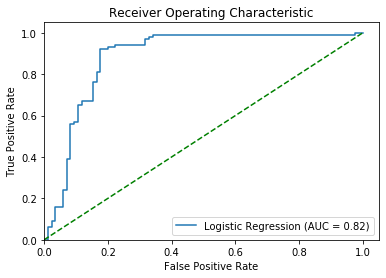

In [31]:
# Display ROC curve 
# AUC - area under the curve is 82% 
# A good model is as far away from the green line as possible

logreg_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('COVID19_ROC')
plt.show()